## Usando lineas

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:


# Cargamos el archivo de datos
f = open('econ-mbeacxc.mtx', 'r')
G =nx.Graph()
# lineas = f.readlines()
# f.close()
while True:
    # Creamos una estructura para poder limpiar los datos aún antes de trabajar con ellos
    linea = f.readline()
    if linea == '': break
    if linea[0] == '%': continue
    n1,n2,w = linea.split(' ')
    n1,n2,w = int(n1),int(n2),float(w)
    if n1 == n2: continue
    G.add_edge(n1,n2,weight=w)

f.close()


In [4]:
print(len(G.edges()),len(G.nodes()))

41686 487


## Usando pandas

In [5]:
ruta = 'econ-mbeacxc.mtx'
f = pd.read_csv(ruta, sep=' ', header=None, skiprows=13, names=['n1','n2','w'])
print(f.head(), "\n", type(f))


    n1   n2             w
0  496  496  49920.000000
1    6    1      0.004546
2    7    1      0.245552
3   19    1      0.025518
4   25    1      0.000071 
 <class 'pandas.core.frame.DataFrame'>


In [6]:
G = nx.from_pandas_edgelist(f, 'n1', 'n2')
print(G, "\n", type(G))


Graph with 488 nodes and 42091 edges 
 <class 'networkx.classes.graph.Graph'>


Aquí hay autoenlaces así que a continuación los vamos a evitar 

In [7]:
G.remove_edges_from(nx.selfloop_edges(G))
print(G, "\n", type(G))

Graph with 488 nodes and 41686 edges 
 <class 'networkx.classes.graph.Graph'>


Lo recomendable es no guardar el set de datos más que nada por consumo de recursos y en lugar de meterlo en una variable, simplemente lo metemos como argumento en la función donde ocupemos los datos.

In [8]:
ruta  = 'ca-netscience.mtx'
data = pd.read_csv(ruta, sep=' ', header=None, skiprows = 2)
data

,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


Una cliqua es un conjunto de nodos que se conectan todos con todos

In [9]:
G = nx.from_pandas_edgelist(data, 0, 1)
G.remove_edges_from(nx.selfloop_edges(G))

for c in nx.find_cliques(G):
    print(c)

[2, 1, 3]
[4, 128, 330, 126, 127]
[4, 164, 61, 165, 166]
[4, 44, 1, 5]
[4, 16, 323, 324, 45]
[4, 16, 5, 1, 250]
[4, 16, 5, 313, 314, 250]
[4, 16, 5, 45, 46, 176, 177, 15, 47]
[4, 16, 5, 373]
[4, 16, 5, 249]
[4, 16, 13, 14, 15]
[4, 16, 371]
[4, 16, 153, 154]
[4, 146]
[4, 274, 13]
[4, 374, 5, 373]
[4, 152]
[6, 8, 7]
[7, 190, 192, 193]
[7, 190, 191]
[8, 137, 342, 343]
[8, 344]
[8, 26]
[8, 189]
[8, 62, 64, 63]
[8, 62, 65]
[9, 10, 11, 12]
[10, 67, 68, 69]
[17, 18, 258, 201]
[17, 18, 261]
[17, 18, 172]
[17, 18, 365]
[17, 18, 13]
[17, 18, 58]
[17, 29]
[19, 208]
[19, 20, 13]
[21, 288, 287]
[21, 33, 109]
[21, 33, 221, 220]
[21, 24, 232, 233, 268]
[21, 24, 220, 23]
[21, 24, 22, 23]
[23, 227, 228]
[23, 50, 51, 52]
[23, 54, 55]
[24, 140, 229]
[24, 79]
[25, 26, 27, 28]
[26, 197]
[26, 198, 251]
[26, 273]
[26, 155, 108]
[26, 95]
[26, 295, 296]
[26, 40]
[26, 297, 231]
[26, 231, 234]
[26, 104, 107, 105, 106]
[26, 104, 107, 108]
[26, 234, 125]
[26, 306]
[26, 124, 125]
[26, 125, 108]
[26, 315, 316, 317]


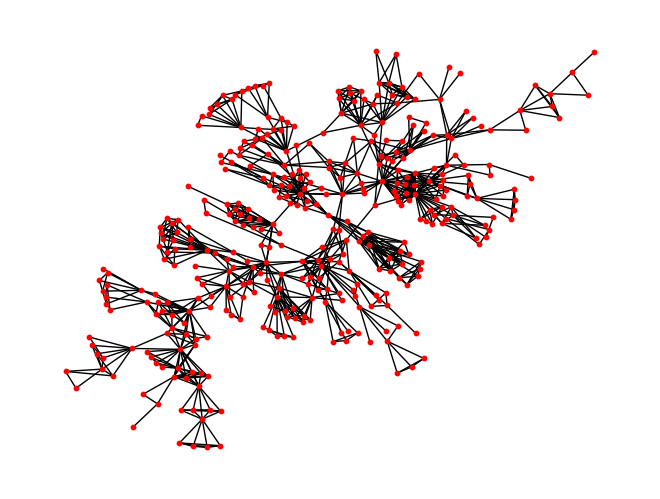

In [10]:
pos = nx.kamada_kawai_layout(G)
nx.draw_kamada_kawai(G, node_size=10, node_color='red')

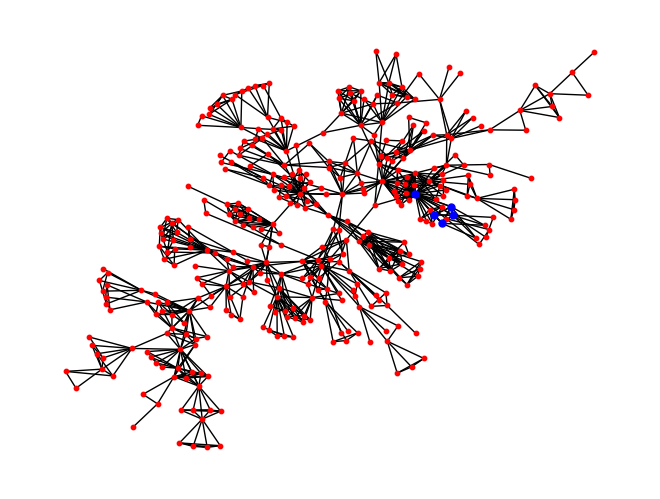

In [11]:
nx.draw(G, pos, node_size=10, node_color='red')
nx.draw(nx.subgraph(G,[4,128,330,126,127]), pos = pos, with_labels=False, node_size=25, node_color='blue')

Esto que estamos haciendo con el subgraph es precisamente para ubicar en nuestra red el conjunto de nodos que se están interconectando con todos. Los estamos resaltando en la red original

In [12]:
for c in nx.find_cliques(G):
    if len(c) == 9:
        print(c)

# Jugamos con la longitud de las cliqas para saber cual es la cliqa más grande de nuestro conjunto de datos

[4, 16, 5, 45, 46, 176, 177, 15, 47]


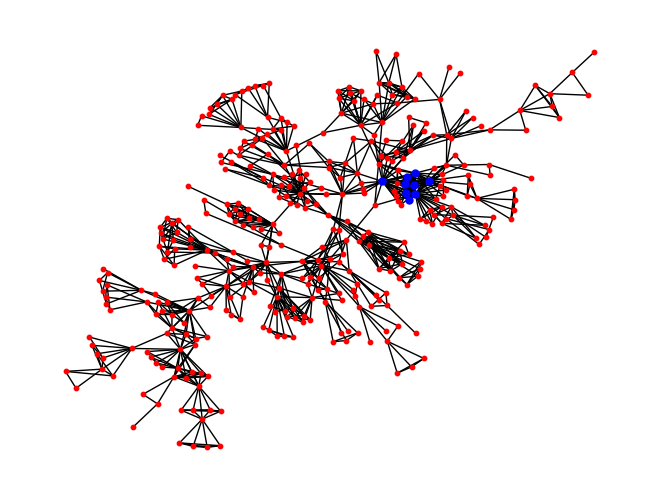

In [13]:
nx.draw(G, pos, node_size=10, node_color='red')
nx.draw(nx.subgraph(G,[4, 16, 5, 45, 46, 176, 177, 15, 47]), pos = pos, with_labels=False, node_size=25, node_color='blue')

Una manera diferente de hacer lo de la celda de arriba


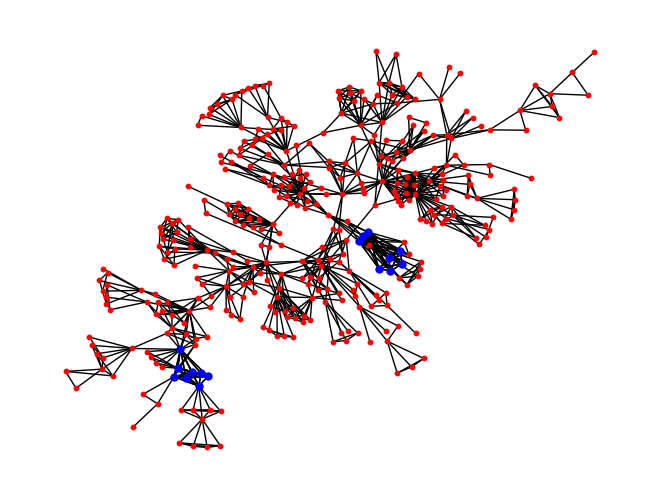

In [14]:
nx.draw(G, pos, node_size=10, node_color='red')
for c in nx.find_cliques(G):
    if len(c) == 8:
        nx.draw(nx.subgraph(G,c), pos = pos, with_labels=False, node_size=25, node_color='blue')

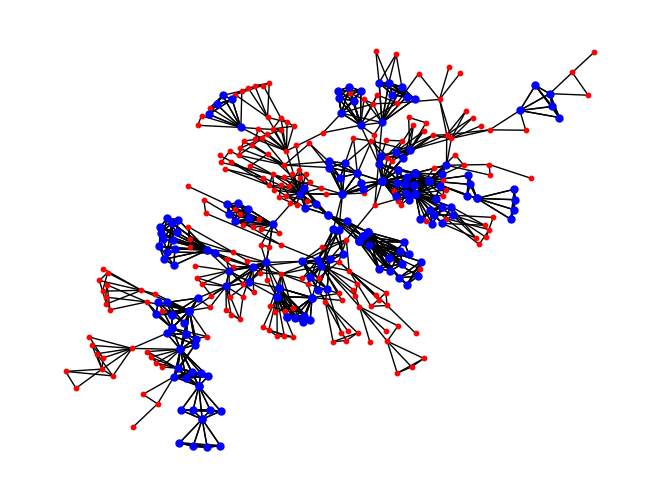

In [16]:
nx.draw(G, pos, node_size=10, node_color='red')
for c in nx.find_cliques(G):
    if len(c) > 4:
        nx.draw(nx.subgraph(G,c), pos = pos, with_labels=False, node_size=25, node_color='blue')

Las cliquas son las más restrictivas de todas las estructuras. Existen más...
- Cores
- Tuplas 
- Etc...

# Clustering

Medida de centralidad. Qué tanto un nodo esta conecctado con un vecino que así mismo qué tanto esta conectado con otros

In [18]:
dict = nx.clustering(G)

In [20]:
colors = np.array([dict[nodo] for nodo in G])

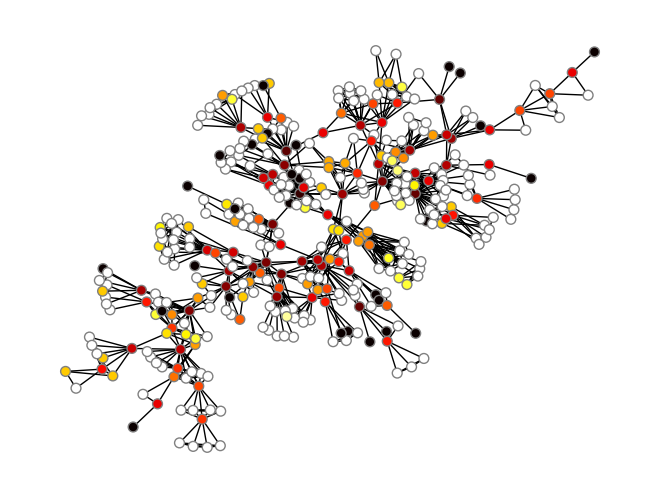

In [26]:
nx.draw(G, pos, node_size=50, node_color=colors, cmap='hot',edgecolors='gray')
# Los blancos son los nodos que tienen más conexiones